<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Artificial-Intelligence/blob/main/TF02_API_B%C3%A1sica_e_RNA_Slide_23_C%C3%A2ncer_de_Mama_Redes_Neurais_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodrigo Rene Menegazzo

Prática: CÂNCER DE MAMA

Base com dados de sangue para detecção de câncer de mama
  * 593 amostras
  * 30 atributos
  * 2 classes: malígno/benígno
  * Base carrega de sklearn

Estratégia:
  * Rede neural com: Entrada e 1 neurônio
  * Classificação – 2 classes
  * Função de ativação Sigmóide (0 – 1)
  * Otimizador : adam
  * Perda : binary_crossentropy
  * Métrica : Acurácia

Carga dos dados

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(type(data), "\n", data.keys())

<class 'sklearn.utils.Bunch'> 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Visualizar o formato dos dados

In [3]:
print(data.data.shape, data.target, data.target_names, data.feature_names, data.target.shape)

(569, 30) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

Separar a base em Treino e Teste

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [5]:
#Antes do pré-processamento
print(X_train[0][0],
X_test[0][0])


21.16 19.59


Pré-processsamento

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fit_transform: calcula a média e o desvio padrão, depois transforma os dados

transform: com os parâmetros calculados, só transforma os dados

In [7]:
print(X_train[0][0],
X_test[0][0])

2.023993950075966 1.5778420713521517


Criação do modelo

In [8]:
import tensorflow as tf

i = tf.keras.layers.Input(shape=(D,))
x = tf.keras.layers.Dense(1, activation='sigmoid')(i)
model = tf.keras.models.Model(i, x)

Compilação do modelo

In [9]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

Treinamento

In [10]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 45ms/step - loss: 1.2949 - accuracy: 0.1916 - val_loss: 1.3163 - val_accuracy: 0.1862
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1786 - accuracy: 0.2336 - val_loss: 1.1842 - val_accuracy: 0.2287
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0674 - accuracy: 0.2782 - val_loss: 1.0646 - val_accuracy: 0.2553
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9696 - accuracy: 0.3202 - val_loss: 0.9559 - val_accuracy: 0.3032
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8821 - accuracy: 0.3753 - val_loss: 0.8599 - val_accuracy: 0.3830
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.8043 - accuracy: 0.4514 - val_loss: 0.7779 - val_accuracy: 0.4681
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7393 - accuracy: 0.5354 - val_loss: 0.7063 - val_accuracy: 0.5266
Epoch 8/

Resultados

In [14]:
print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9580
Train score:  [0.1276690810918808, 0.9580052495002747]
6/6 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9734
Test score:  [0.09611115604639053, 0.9734042286872864]


Gráficos da Descida do Gradiente

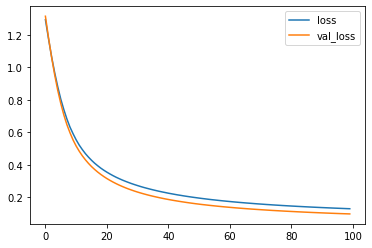

In [19]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Gráficos da Acurácia

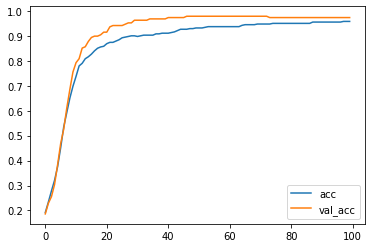

In [20]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Efetuando Predições

In [22]:
pred = model.predict(X_test)
print(pred)

[[1.7478526e-02]
 [1.8426776e-03]
 [9.9899292e-01]
 [9.9301207e-01]
 [9.5588791e-01]
 [2.1150982e-01]
 [1.8089095e-01]
 [8.6905825e-01]
 [5.7652360e-01]
 [9.6414500e-01]
 [1.0387373e-01]
 [9.9380791e-01]
 [1.7446432e-01]
 [9.9452043e-01]
 [9.7811997e-01]
 [9.5918143e-01]
 [2.9830813e-02]
 [9.7296196e-01]
 [9.8305082e-01]
 [9.9800259e-01]
 [5.4787844e-05]
 [9.6879357e-01]
 [1.1077136e-02]
 [9.9831212e-01]
 [4.1968226e-03]
 [9.9641073e-01]
 [9.8721677e-01]
 [9.8018897e-01]
 [9.8440242e-01]
 [9.6955335e-01]
 [8.7700456e-01]
 [9.7880006e-01]
 [5.1022673e-01]
 [7.9200220e-01]
 [4.8818082e-02]
 [9.9126947e-01]
 [6.4835614e-01]
 [2.0507872e-03]
 [9.5073485e-01]
 [9.7546351e-01]
 [3.0155361e-02]
 [8.7529147e-01]
 [9.1446042e-03]
 [9.9137348e-01]
 [8.8400638e-01]
 [7.0278472e-01]
 [9.9486434e-01]
 [9.9689460e-01]
 [7.3611527e-06]
 [9.9510670e-01]
 [7.7551126e-01]
 [1.1181116e-02]
 [4.0941823e-01]
 [1.4929515e-01]
 [9.9811101e-01]
 [5.7717997e-01]
 [9.9883604e-01]
 [9.9759346e-01]
 [3.7790239e-0

Arredonda e achata o resultado

A camada de saída é sigmóide : 0 - 1

In [23]:
import numpy as np
# flatten: transformar em vetor, pois está em matriz (N,1)
pred = np.round(pred).flatten()
print(pred)

[0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


Cálculo da Acurácia

In [24]:
print("Acurácia na mão: ", np.mean(pred == Y_test))
print("Evaluate: ", model.evaluate(X_test, Y_test))
print("")
print("Acurácia: ", model.evaluate(X_test, Y_test)[1])

Acurácia na mão:  0.973404255319149
6/6 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9734
Evaluate:  [0.09611115604639053, 0.9734042286872864]

6/6 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9734
Acurácia:  0.9734042286872864
